In [1]:
import pickle
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Constants

In [3]:
BATCHES = 214
EPOCH = 300
DUMP_FOR = 10
REPS = 3

In [8]:
def get_loss(path, DUMP_FOR=10, EPOCH=300, BATCHES=214, reps=5):
    losses = []
    for rep in range(reps):
        loss = []
        for it in range(DUMP_FOR, EPOCH+1, DUMP_FOR):
            try:
                with open(path.format(rep, 'train', BATCHES*it), 'rb') as f:
                    res = pickle.load(f)
            except FileNotFoundError:
                it = it - DUMP_FOR
                break
            loss.extend(res['loss'])
        loss = np.split(np.array(loss), it)
        loss = np.mean(loss, axis=1)
        losses.append(loss)
    return np.array(losses)

def get_f_score(path, DUMP_FOR=10, EPOCH=300, BATCHES=214, reps=5):
    f_scores = []
    for rep in range(reps):
        fs = []
        for it in range(DUMP_FOR, EPOCH+1, DUMP_FOR):
            try:
                with open(path.format(rep, 'f_score', BATCHES*it), 'rb') as f:
                    res = pickle.load(f)
                    fs.append(res['f_score'][0])
            except FileNotFoundError:
                fs = fs[:-1]
                break
        f_scores.append(fs)
    return np.array(f_scores)

def get_trainable_variables(path):
    with open(path.format(1, 'trainable_variables', '2'), 'rb') as f:
        res = pickle.load(f)
    return res['trainable_variables'][0]

def plot_interval(arrs, names, step=1, save_name=None, xlab='', ylab='', title='', 
                  figsize=(20, 12), ylim=None, ep=500):
    plt.figure(figsize=figsize)

    for arr, name in zip(arrs, names):
        arr = np.array(arr)
        arr_mean = np.mean(arr, axis=0)
        arr_std = np.std(arr, axis=0)
        l = len(arr_mean) * step
        plt.grid(True)
        plt.plot(range(0, l, step), arr_mean, linewidth=3, label=name)
        plt.legend()
        plt.fill_between(range(0, l, step), arr_mean+arr_std, arr_mean-arr_std, alpha=.3)
        plt.ylabel(ylab)
        plt.xlabel(xlab)
        plt.title(title)
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    if save_name:
        plt.savefig(save_name, format="png", dpi=500)
        
def scatter_params(params, f_scores, names, save_name=None, xlab='', ylab='', title='', 
                  figsize=(20, 12), ylim=None, xlim=None, xscale='log'):
    plt.figure(figsize=figsize)
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    if ylim:
        plt.ylim(ylim[0], xlim[1])
    plt.grid(True)
    plt.xscale(xscale)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.title(title)
    results = []
    errs = []
    for arr in f_scores:
        arr = np.array(arr)
        results.append(np.mean(arr, axis=0)[-1])
        errs.append(np.std(arr, axis=0)[-1])

    plt.scatter(params, results)
    plt.errorbar(params, results, errs, fmt='o')

    for i, txt in enumerate(names):
    #     if txt == "ResNet18":
    #         shift_x = -2650000
    #         plt.annotate(txt, (params[i]+shift_x, results[i]-0.002), size=14)
    #     elif txt == "ResNetCustom1":
    #         shift_x = -370000
    #         plt.annotate(txt, (params[i]+shift_x, results[i]-0.002), size=14)
    #     elif txt == "ResNet34":
    #         shift_x = -5000000
    #         plt.annotate(txt, (params[i]+shift_x, results[i]-0.002), size=14)
    #     else:
        plt.annotate(txt, (params[i]*1.1, results[i]-0.002), size=14)
    if save_name:
        plt.savefig(save_name, format="png", dpi=500)

# ResNet

In [17]:
paths = {
        'ResNet18': 'ClassicResNetResearch_500ep/results/layout_cnacna-model_ResNet18/{}/{}_{}',
        'ResNet34': 'ClassicResNetResearch_500ep/results/layout_cnacna-model_ResNet34/{}/{}_{}',
        'ResNetC1': 'CustomResNetResearch_300ep/results/blocks_[1, 1, 1, 1, 1, 1, 1]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_8-layout_cna-model_ResNetCustom/{}/{}_{}',

##   'ResNetC2': 'CustomResNetResearch_300ep/results/blocks_[1, 1, 1, 1, 1, 1, 1]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_32-layout_cna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC3': 'CustomResNetResearch_300ep/results/blocks_[1, 1, 1, 1, 1, 1, 1]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_8-layout_cnacna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC4': 'CustomResNetResearch_300ep/results/blocks_[1, 1, 1, 1, 1, 1, 1]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_32-layout_cnacna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC5': 'CustomResNetResearch_300ep/results/blocks_[2, 2, 2, 2, 2, 2, 2]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_8-layout_cna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC6': 'CustomResNetResearch_300ep/results/blocks_[2, 2, 2, 2, 2, 2, 2]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_32-layout_cna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC7': 'CustomResNetResearch_300ep/results/blocks_[2, 2, 2, 2, 2, 2, 2]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_8-layout_cnacna-model_ResNetCustom/{}/{}_{}',

        'ResNetC8': 'CustomResNetResearch_300ep/results/blocks_[2, 2, 2, 2, 2, 2, 2]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_32-layout_cnacna-model_ResNetCustom/{}/{}_{}',
##    'ResNetC9': 'CustomResNetResearch_300ep/results/blocks_[2, 3, 4, 5, 4, 3, 2]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_8-layout_cna-model_ResNetCustom/{}/{}_{}',
##    'ResNetC10': 'CustomResNetResearch_300ep/results/blocks_[2, 3, 4, 5, 4, 3, 2]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_32-layout_cna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC11': 'CustomResNetResearch_300ep/results/blocks_[2, 3, 4, 5, 4, 3, 2]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_8-layout_cnacna-model_ResNetCustom/{}/{}_{}',
        'ResNetC12': 'CustomResNetResearch_300ep/results/blocks_[2, 3, 4, 5, 4, 3, 2]-filters_[4, 4, 8, 8, 16, 16, 20]-input_filters_32-layout_cnacna-model_ResNetCustom/{}/{}_{}',   
##    'ResNetC13': 'CustomResNetResearch_300ep/results/blocks_[2, 3, 4, 5, 4, 3, 2]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_8-layout_cna-model_ResNetCustom/{}/{}_{}',
        'ResNetC14': 'CustomResNetResearch_300ep/results/blocks_[2, 3, 4, 5, 4, 3, 2]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_32-layout_cna-model_ResNetCustom/{}/{}_{}',
##    'ResNetC15': 'CustomResNetResearch_300ep/results/blocks_[2, 3, 4, 5, 4, 3, 2]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_8-layout_cnacna-model_ResNetCustom/{}/{}_{}',
        'ResNetC16': 'CustomResNetResearch_300ep/results/blocks_[2, 3, 4, 5, 4, 3, 2]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_32-layout_cnacna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC17': 'CustomResNetResearch_300ep/results/blocks_[1, 1, 1, 1, 1, 1, 1]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_8-layout_cna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC18': 'CustomResNetResearch_300ep/results/blocks_[1, 1, 1, 1, 1, 1, 1]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_32-layout_cna-model_ResNetCustom/{}/{}_{}',
        'ResNetC19': 'CustomResNetResearch_300ep/results/blocks_[1, 1, 1, 1, 1, 1, 1]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_8-layout_cnacna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC20': 'CustomResNetResearch_300ep/results/blocks_[1, 1, 1, 1, 1, 1, 1]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_32-layout_cnacna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC21': 'CustomResNetResearch_300ep/results/blocks_[2, 2, 2, 2, 2, 2, 2]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_8-layout_cna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC22': 'CustomResNetResearch_300ep/results/blocks_[2, 2, 2, 2, 2, 2, 2]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_32-layout_cna-model_ResNetCustom/{}/{}_{}',
##   'ResNetC23': 'CustomResNetResearch_300ep/results/blocks_[2, 2, 2, 2, 2, 2, 2]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_8-layout_cnacna-model_ResNetCustom/{}/{}_{}',
##  'ResNetC24': 'CustomResNetResearch_300ep/results/blocks_[2, 2, 2, 2, 2, 2, 2]-filters_[4, 8, 16, 32, 64, 128, 256]-input_filters_32-layout_cnacna-model_ResNetCustom/{}/{}_{}',
    
#    'VGG16': 'ClassicVGGResearch/results/arch_[(2, 0, 64, 1), (2, 0, 128, 1), (4, 0, 256, 1), (4, 0, 512, 1), (4, 0, 512, 1)]-head_units_[100, 100, 2]-model_VGG/{}/{}_{}',
#    'VGG19': 'ClassicVGGResearch/results/arch_[(2, 0, 64, 1), (2, 0, 128, 1), (2, 1, 256, 1), (2, 1, 512, 1), (2, 1, 512, 1)]-head_units_[100, 100, 2]-model_VGG/{}/{}_{}',
#    'VGGC1': 'CustomVGGResearch/results/arch_[(1, 0, 4, 1), (1, 0, 8, 1), (1, 0, 8, 1), (1, 0, 16, 1), (1, 0, 16, 1), (1, 0, 20, 1), (1, 0, 20, 1)]-head_units_[100, 100, 2]-model_VGG/{}/{}_{}',
#    'VGGC2': 'CustomVGGResearch/results/arch_[(2, 0, 4, 1), (2, 0, 8, 1), (2, 0, 16, 1), (2, 0, 32, 1), (2, 0, 64, 1), (2, 0, 128, 1), (2, 0, 256, 1)]-head_units_[100, 100, 2]-model_VGG//{}/{}_{}',
#    'VGGC3': 'CustomVGGResearch/results/arch_[(2, 0, 4, 1), (2, 0, 8, 1), (2, 0, 16, 1), (2, 0, 32, 1), (2, 1, 64, 1), (2, 1, 128, 1), (2, 1, 256, 1)]-head_units_[100, 100, 2]-model_VGG//{}/{}_{}',
}

In [18]:
losses = [get_loss(val) for val in paths.values()]

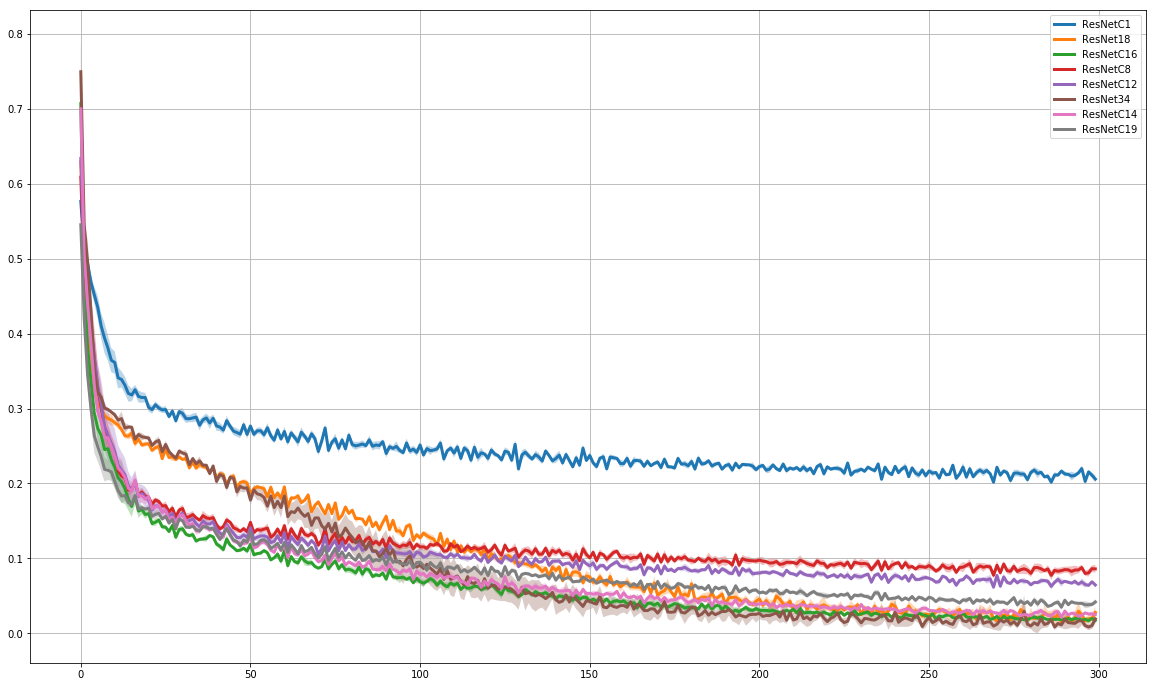

In [19]:
plot_interval(losses, paths.keys())

In [20]:
f_scores = [get_f_score(val) for val in paths.values()]

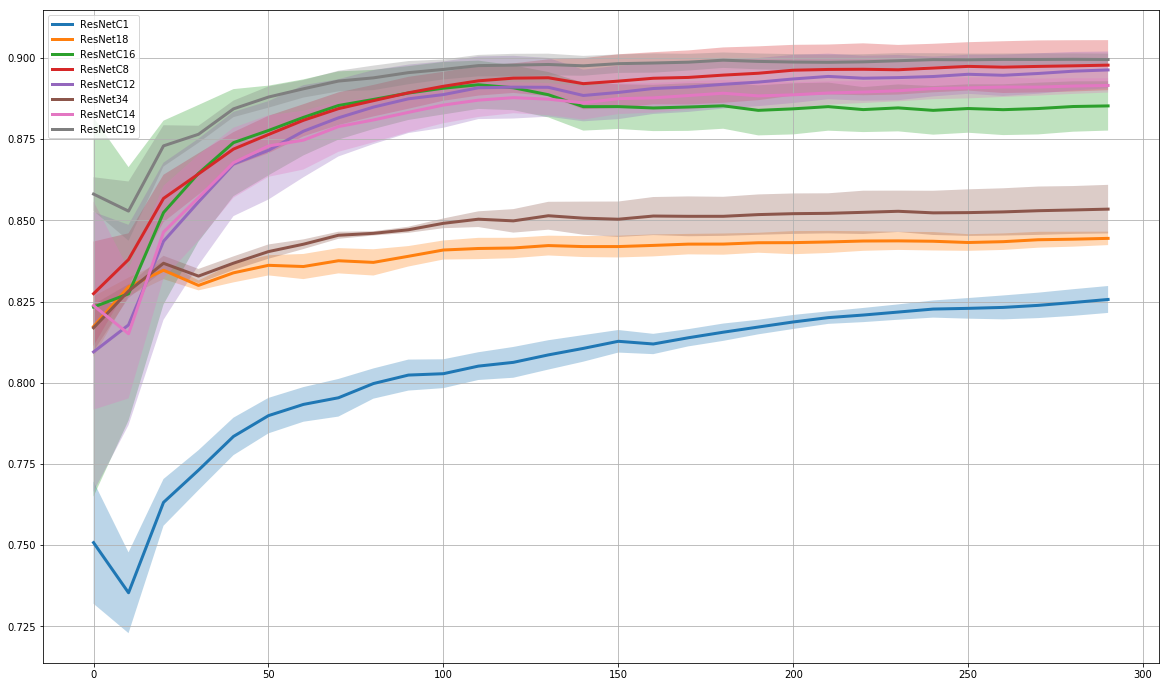

In [21]:
plot_interval(f_scores, paths.keys(), step=10)

In [22]:
params = [get_trainable_variables(path) for path in paths.values()]

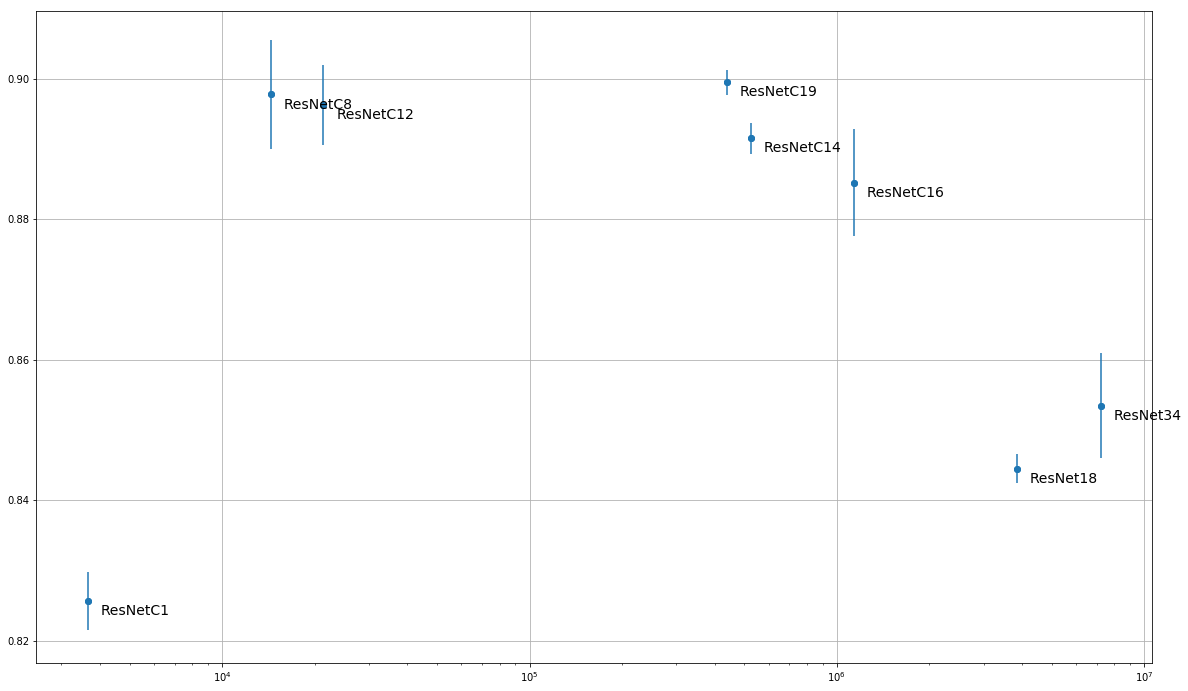

In [23]:
scatter_params(params, f_scores, paths.keys())